### Importing libraries

In [2]:
import numpy as np

The Simplest form of regression is 

$$y = x*w + b$$

Where,
* y = dependent variable
* b = constant
* w = slope
* x = independent variable

#### 1. `Understnading the loss function`

Here we are going to use the Mean Square Error loss function
$$
MSE = J(w, b) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

The goal is to minimise MSE to find the optimal slope and intercept

#### 2. `Optimization Algorithm (Gradient Descent)`

Using gradient descent we iteratively calculate the gradients of the loss function with
respect to the parameters and keep on updating the parameters till we reach the local minima.

#### 3. `Steps to Implement Gradient Descent`

* Step 1: `Initialising Parameters`:
 
Initialise the slope = np.zeros(number of features) and intercept = 0

* Step 2: `Calculate the Partial Derivatives with recpect to parameters`:

$$\frac{\delta J}{\delta w} = \delta w = \frac{1}{N} \sum_{i=1}^{N} 2x_i(\hat{y} - y_i)$$

$$\frac{\delta J}{\delta b} = \delta b =\frac{1}{N} \sum_{i=1}^{N} 2(\hat{y} - y_i)$$

where,
$$y_{predicted} = \hat{y} = x_iw + b$$

* Step 3: `Updating the Parameters`

$$w = w - Lr * \delta w$$
$$b = b - Lr * \delta b$$

#### 4. `Implementing Linear Regression from Scratch in Python`

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [18]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

#### Predicting using linear regression

MSE: 305.7719958301902
r2: 0.9253717934621964


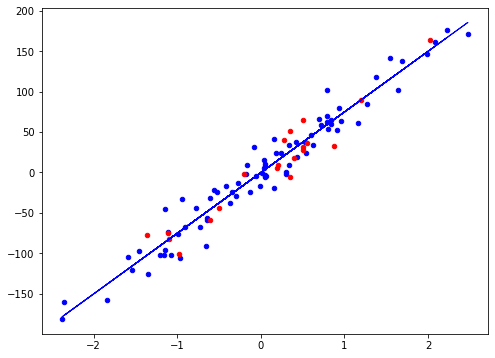

In [19]:
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

X, y = datasets.make_regression(n_samples=100,
                                n_features=1,
                                noise=20,
                                random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1234)

regressor = LinearRegression(lr=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

accu = r2_score(y_test, predictions)
print("r2:", accu)

y_pred_line = regressor.predict(X)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train, y_train, color="blue", s=20)
ax.scatter(X_test, y_test, color="red", s=20)
plt.plot(X, y_pred_line, color="blue", linewidth=1, label="Prediction")
plt.show()    
